In [303]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

df = sns.load_dataset('titanic')


In [308]:
def check_dtype(dataframe: pd.DataFrame):
    for column in df.columns:
        if df[column].dtype.name.startswith('float') | df[column].dtype.name.startswith('int'):
            if set(df[column].unique()).difference({0,1}) == set():
                df[column] = df[column].astype(bool)
            elif all(np.isclose(df[column], df[column].astype(int))):
                df[column] = df[column].astype(int)
        elif df[column].dtype.name in ['object', 'category']:
            if len(df[column].unique()) == 2:
                if set(_.upper() for _ in df[column].unique()) in [{'YES', 'NO'}, {'Y', 'N'}, {'TRUE', 'FALSE'}, {'T', 'F'}]:
                    bool_dict = {'YES':1, 'NO':0, 'Y':1, 'N':0, 'TRUE':1, 'FALSE':0, 'T':1, 'F':0}
                    df[column] = df[column].apply(lambda x:bool_dict[x.upper()])
    return df
        

In [319]:
def show_graph_by_dtype(column: pd.Series):
    print(f'\n# COLUMN NAME : {column.name}')
    if column.dtype.name.startswith('float'):
        show_histogram(column)
    elif column.dtype.name.startswith('int'):
        if len(column.unique()) <= 5:
            show_count_bar_plot(column)
        else:
            show_histogram(column)
    elif column.dtype.name in ['object', 'category']:
        show_count_bar_plot(column)
    elif column.dtype.name.startswith('bool'):
        show_count_bar_plot(column)
    else:
        raise f'check {column} dtype and add new code line'
    

In [314]:
def show_histogram(column: pd.Series):
    na_count = column.isna().count()
    bin_info_box = sns.histplot(column[column.notna()]).patches
    bin_counts = [round(_.get_height()) for _ in bin_info_box]
    left_bin_range = [round(_._x0, 2) for _ in bin_info_box]
    left_bin_range.append(round(column.max(), 2))
    plt.show()
    print(f'전체 bin 개수 : {len(bin_counts)}')
    print(f'전체 결측치 건수 : {na_count}\n')
    print('bin 최소 범위 ~ 최대 범위 : 빈도 수')
    for idx in range(len(bin_counts)):
        print(f'{left_bin_range[idx]} ~ {left_bin_range[idx+1]} : {bin_counts[idx]}')

In [315]:
def show_count_bar_plot(column: pd.Series):
    bin_info_box = sns.countplot(column).patches
    bin_counts = [round(_.get_height()) for _ in bin_info_box]
    plt.show()

    print(f'전체 클래스 개수 : {len(bin_counts)}\n')
    print('클래스 별 건수')
    print(df['class'].value_counts().sort_index())

In [307]:
df.dropna(inplace=True)
df = check_dtype(df)


# COLUMN NAME : survived


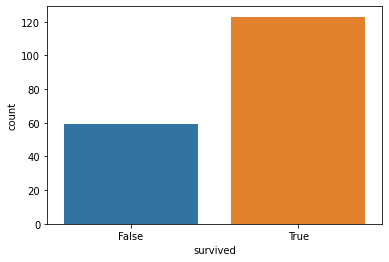

전체 클래스 개수 : 2

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : pclass


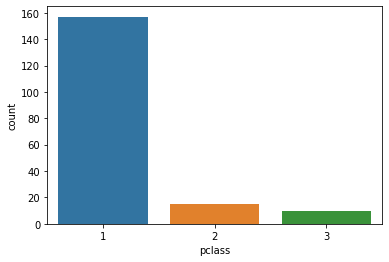

전체 클래스 개수 : 3

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : sex


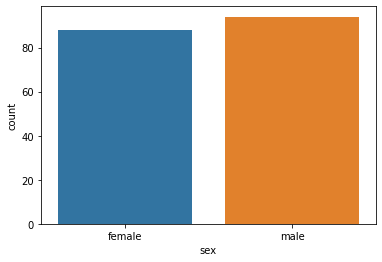

전체 클래스 개수 : 2

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : age


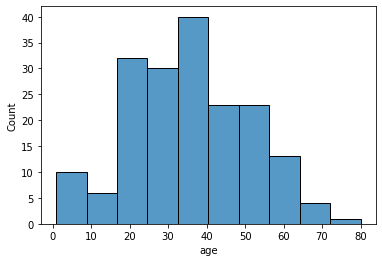

전체 bin 개수 : 10
전체 결측치 건수 : 182

bin 최소 범위 ~ 최대 범위 : 빈도 수
0.92 ~ 8.83 : 10
8.83 ~ 16.74 : 6
16.74 ~ 24.64 : 32
24.64 ~ 32.55 : 30
32.55 ~ 40.46 : 40
40.46 ~ 48.37 : 23
48.37 ~ 56.28 : 23
56.28 ~ 64.18 : 13
64.18 ~ 72.09 : 4
72.09 ~ 80.0 : 1

# COLUMN NAME : sibsp


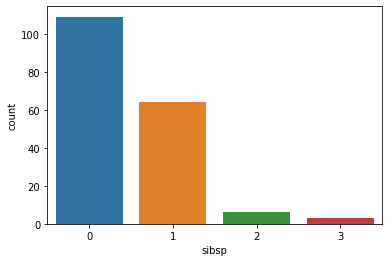

전체 클래스 개수 : 4

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : parch


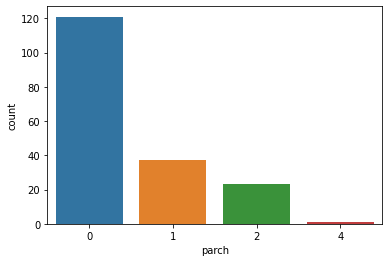

전체 클래스 개수 : 4

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : fare


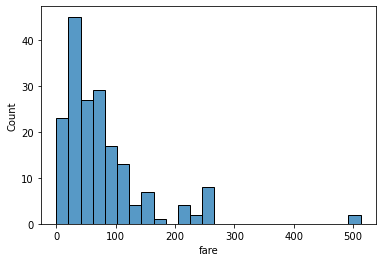

전체 bin 개수 : 25
전체 결측치 건수 : 182

bin 최소 범위 ~ 최대 범위 : 빈도 수
0.0 ~ 20.49 : 23
20.49 ~ 40.99 : 45
40.99 ~ 61.48 : 27
61.48 ~ 81.97 : 29
81.97 ~ 102.47 : 17
102.47 ~ 122.96 : 13
122.96 ~ 143.45 : 4
143.45 ~ 163.95 : 7
163.95 ~ 184.44 : 1
184.44 ~ 204.93 : 0
204.93 ~ 225.42 : 4
225.42 ~ 245.92 : 2
245.92 ~ 266.41 : 8
266.41 ~ 286.9 : 0
286.9 ~ 307.4 : 0
307.4 ~ 327.89 : 0
327.89 ~ 348.38 : 0
348.38 ~ 368.88 : 0
368.88 ~ 389.37 : 0
389.37 ~ 409.86 : 0
409.86 ~ 430.36 : 0
430.36 ~ 450.85 : 0
450.85 ~ 471.34 : 0
471.34 ~ 491.84 : 0
491.84 ~ 512.33 : 2

# COLUMN NAME : embarked


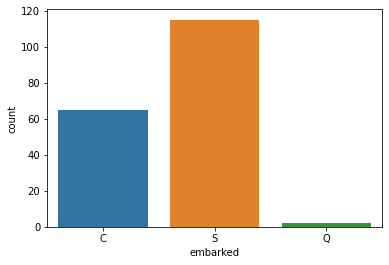

전체 클래스 개수 : 3

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : class


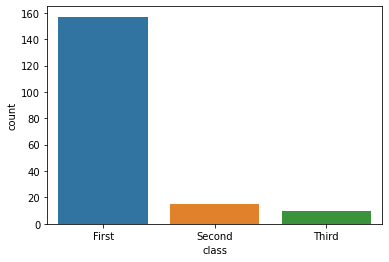

전체 클래스 개수 : 3

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : who


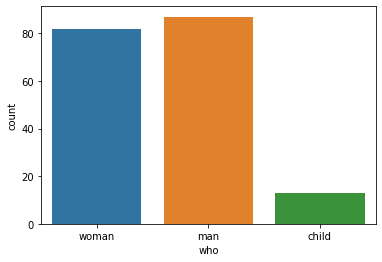

전체 클래스 개수 : 3

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : adult_male


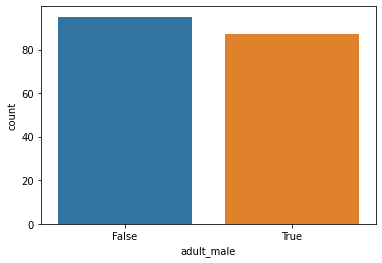

전체 클래스 개수 : 2

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : deck


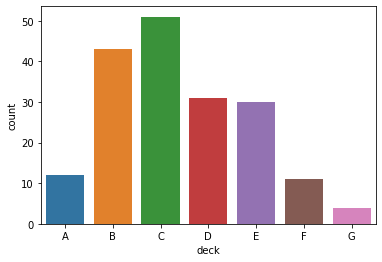

전체 클래스 개수 : 7

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : embark_town


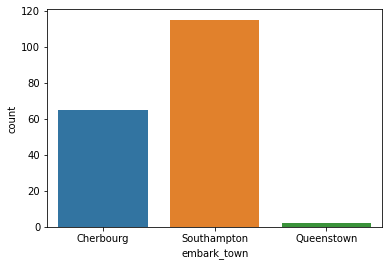

전체 클래스 개수 : 3

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : alive


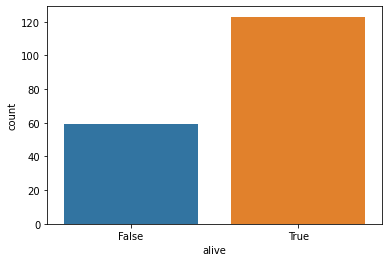

전체 클래스 개수 : 2

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64

# COLUMN NAME : alone


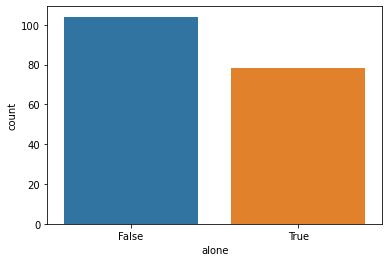

전체 클래스 개수 : 2

클래스 별 건수
First     157
Second     15
Third      10
Name: class, dtype: int64


In [322]:
# %matplotlib qt 
# %matplotlib inline
for _ in df.columns:
    show_graph_by_dtype(df[_])